**Origins**

Michelin Stars originated in a country best known for its passion for cuisine – France. Originally they were a feature of the Michelin guide books published in 1900 by Andre and Edourd Michelin - the founders of the Michelin tyre company.
Having started the company in 1889 the brothers were looking for a method to compel the then limited number of drivers to make more journeys and by extension, buy more tyres. The guide listed a wealth of information for motorists which included where to find the best meals and accommodation whilst touring in their cars.

As the business grew, so did the guide, becoming so popular that a charge was introduced in 1920.

By then, the dining element was in such high demand that Michelin decided to set up a team of inspectors whose job it was to visit – anonymously - and rate restaurants on a 3-category basis. The rating systems – still in place today and with more than a passing nod to its motoring roots - was referred to as ‘Michelin Stars’. 3 stars being ‘exceptional cuisine, worth a special journey’, 2 stars ‘excellent cooking, worth a detour and 1 star, a very good restaurant in its category’

Project: Contracted by a hotel team to perfom an analyisis on singapore michelin restaurants in order to provide insights and trends on those, and to help the new luxury hotel to decide which type of cuisine restaurnt to open. 

The project goal is to analyze Michelin Stars data to uncover trends and insights for a new luxury hotel in Paris. 

The aim is to provide actionable recommendations to help choose the type of cuisine for the new hotel.

To proceed, I'll perform several steps:

Data Collection: Gather Michelin Stars data, including details on starred restaurants, their locations, types of cuisine, and price range.


Data Analysis: Analyze the data to identify trends and patterns, such as popular types of cuisine, price , and geographic distribution.


Insights and Recommendations: Based on the analysis, provide recommendations for the type of cuisine that would be most suitable for the new luxury hotel in Singapore.

The combined data for both one-star two-star and three-star Michelin Restaurants contain the following columns:

name: Restaurant name

year: Awarded year

latitude: Latitude of restaurant

longitude: Longitude of restaurant

city: City where the restaurant is located

region: Region where the restaurant is located

zipCode: Postal code of the restaurant's location

cuisine: Type of cuisine served at the Michelin restaurant

price: Price range of the restaurant

url: URL to the restaurant's Michelin guide page


In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load the standard libraries to visualize data set
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from bokeh.plotting import figure, output_notebook, show, save 
from bokeh.models import ColumnDataSource, HoverTool

output_notebook() #specify the Bokeh plots should be embedded within the Jupyter noteboo import pandas as pd

import pandas_bokeh 
pd.set_option('plotting.backend', 'pandas_bokeh')
import warnings 
warnings.filterwarnings('ignore')

/kaggle/input/singapore-shapefile/gadm41_SGP_0.prj
/kaggle/input/singapore-shapefile/gadm41_SGP_0.cpg
/kaggle/input/singapore-shapefile/gadm41_SGP_0.shp
/kaggle/input/singapore-shapefile/gadm41_SGP_0.shx
/kaggle/input/singapore-shapefile/gadm41_SGP_1.dbf
/kaggle/input/singapore-shapefile/gadm41_SGP_0.dbf
/kaggle/input/singapore-shapefile/gadm41_SGP_1.prj
/kaggle/input/singapore-shapefile/gadm41_SGP_1.cpg
/kaggle/input/singapore-shapefile/gadm41_SGP_1.shx
/kaggle/input/singapore-shapefile/gadm41_SGP_1.shp
/kaggle/input/michelin-star-restaurants/one-star-michelin-restaurants.csv
/kaggle/input/michelin-star-restaurants/three-stars-michelin-restaurants.csv
/kaggle/input/michelin-star-restaurants/two-stars-michelin-restaurants.csv


Loading BokehJS ...

ModuleNotFoundError: No module named 'pandas_bokeh'

In [79]:
# Load the three Michelin Stars dataset into a pandas dataframe

one_star = pd.read_csv('/kaggle/input/michelin-star-restaurants/one-star-michelin-restaurants.csv')
two_stars = pd.read_csv('/kaggle/input/michelin-star-restaurants/two-stars-michelin-restaurants.csv')
three_stars = pd.read_csv('/kaggle/input/michelin-star-restaurants/three-stars-michelin-restaurants.csv')


In [80]:
# Display the first 5 rows of one dataset

one_star.head(5)


,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...
1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...


In [81]:
# Add a new Michelin stars Classification Column

one_star['Michelin stars'] = 1
two_stars['Michelin stars'] = 2
three_stars['Michelin stars'] = 3

# Join the three tables for an easier analysis

michelin_stars = pd.concat([one_star,two_stars,three_stars],axis=0)
michelin_stars

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin stars
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
...,...,...,...,...,...,...,...,...,...,...,...
31,Fat Duck,2019,51.508280,-0.702320,Bray,United Kingdom,SL6 2AQ,Creative,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
32,Waterside Inn,2019,51.507730,-0.701210,Bray,United Kingdom,SL6 2AT,Classic French,NaN,https://guide.michelin.com/gb/en/buckinghamshi...,3
33,Alain Ducasse at The Dorchester,2019,51.507120,-0.152520,Mayfair,United Kingdom,W1K 1QA,French,NaN,https://guide.michelin.com/gb/en/greater-londo...,3
34,The Araki,2019,51.511826,-0.140389,Mayfair,United Kingdom,W1S 3BF,Japanese,NaN,https://guide.michelin.com/gb/en/greater-londo...,3


In [85]:
michelin_stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 35
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            695 non-null    object 
 1   year            695 non-null    int64  
 2   latitude        695 non-null    float64
 3   longitude       695 non-null    float64
 4   city            693 non-null    object 
 5   region          695 non-null    object 
 6   cuisine         695 non-null    object 
 7   price           519 non-null    object 
 8   Michelin stars  695 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 54.3+ KB


# **Data Cleaning and Preprocessing**

In [87]:
#Drop columns

michelin_stars = michelin_stars.drop(columns=['url','zipCode'])

* Some columns were omitted, such as ‘url’ and ’zipCode’ because of their low relevance for this analysis

In [9]:
#Duplicates

duplicates_stars = michelin_stars[michelin_stars.duplicated()].copy()
duplicates_stars

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars


* Data shows has 0 duplicates.

In [10]:
#Missing values

michelin_stars.isna().sum()

name                0
year                0
latitude            0
longitude           0
city                2
region              0
cuisine             0
price             176
Michelin stars      0
dtype: int64

* Data shows missing values on columns 'city' and 'price' that needs handling.

In [11]:
print(michelin_stars['price'].unique())

['$$$$$' '$$$$' '$$$' '$$' '$' nan]


In [90]:
#Handling missing values (NaN values) on the 'price' column
 
michelin_stars['price'].fillna('', inplace=True)
print(michelin_stars['price'].unique())

['$$$$$' '$$$$' '$$$' '$$' '$' '']


/tmp/ipykernel_33/3430188342.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [13]:
# Locate the missing values in the 'city' column
missing_values = michelin_stars[michelin_stars['city'].isna()]
print(missing_values)

      name  year   latitude   longitude city     region     cuisine price  \
152  Épure  2019  22.295830  114.169304  NaN  Hong Kong      French   $$$   
166  Arbor  2019  22.283146  114.155420  NaN  Hong Kong  Innovative   $$$   

     Michelin stars  
152               1  
166               1  


In [88]:
#Handling missing values (NaN values) on the 'city' column  

michelin_stars['city'].fillna('', inplace=True)
missing_values = michelin_stars[michelin_stars['city'].isna()]
print(missing_values)

Empty DataFrame
Columns: [name, year, latitude, longitude, city, region, cuisine, price, Michelin stars]
Index: []


/tmp/ipykernel_33/1127807254.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [91]:
michelin_stars.isna().sum()

name              0
year              0
latitude          0
longitude         0
city              0
region            0
cuisine           0
price             0
Michelin stars    0
dtype: int64

* Data is now clean and there is no further missing values.

In [92]:
print(michelin_stars['year'].unique())

[2019 2018]


In [93]:
print(michelin_stars['region'].unique())

['Austria' 'California' 'Chicago' 'Croatia' 'Czech Republic' 'Denmark'
 'Finland' 'Greece' 'Hong Kong' 'Hungary' 'Macau' 'Norway' 'New York City'
 'Poland' 'Ireland' 'Rio de Janeiro' 'Sao Paulo' 'South Korea' 'Singapore'
 'Sweden' 'Taipei' 'Thailand' 'Washington DC' 'United Kingdom']


# **Summary Statistics**

In [97]:
michelin_stars.sample(10)

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars
243,Caviar Russe,2019,40.760685,-73.973550,New York,New York City,Contemporary,$$$$,1
433,Simon Radley at Chester Grosvenor,2019,53.190640,-2.889130,Chester,United Kingdom,Modern cuisine,,1
382,Sra Bua by Kiin Kiin,2019,13.754137,100.534510,Bangkok,Thailand,Thai Contemporary,$$$,1
500,Hakkasan Mayfair,2019,51.510370,-0.144750,Mayfair,United Kingdom,Chinese,,1
97,Belmond Le Manoir aux Quat' Saisons,2019,51.716740,-1.091870,Great Milton,United Kingdom,French,,2
67,Maude,2019,34.064346,-118.399040,Los Angeles,California,Contemporary,$$$$,1
390,Methavalai Sorndaeng,2019,13.756321,100.502045,Bangkok,Thailand,Thai,$$,1
294,Dosa,2019,37.524450,127.044410,Seoul,South Korea,Innovative,$$$,1
101,CORE by Clare Smyth,2019,51.512610,-0.203052,North Kensington,United Kingdom,Modern British,,2
130,Demo,2019,60.164806,24.941635,Helsingfors / Helsinki,Finland,Modern cuisine,$$$,1


In [99]:
#Statistics
michelin_stars.describe(include='all',)

,name,year,latitude,longitude,city,region,cuisine,price,Michelin stars
count,695,695.000000,695.000000,695.000000,695,695,695,695,695.000000
unique,684,NaN,NaN,NaN,180,24,70,6,NaN
top,L'Atelier de Joël Robuchon,NaN,NaN,NaN,New York,United Kingdom,Modern cuisine,$$$$,NaN
freq,3,NaN,NaN,NaN,74,162,108,197,NaN
mean,NaN,2018.943885,37.260124,4.417000,NaN,NaN,NaN,NaN,1.261871
std,NaN,0.230310,18.025875,81.095189,NaN,NaN,NaN,NaN,0.545270
min,NaN,2018.000000,-23.634005,-123.719444,NaN,NaN,NaN,NaN,1.000000
25%,NaN,2019.000000,25.040718,-73.982920,NaN,NaN,NaN,NaN,1.000000
50%,NaN,2019.000000,40.727130,-0.149570,NaN,NaN,NaN,NaN,1.000000
75%,NaN,2019.000000,51.508962,100.578855,NaN,NaN,NaN,NaN,1.000000


# **Data Visualization**

* **Distribution of Michelin Stars Restaurants Worldwide:**

In [39]:
# Calculate the Michelin Restaurants Worldwide 
star_counts = michelin_stars['Michelin stars'].value_counts()
star_counts

Michelin stars
1    549
2    110
3     36
Name: count, dtype: int64

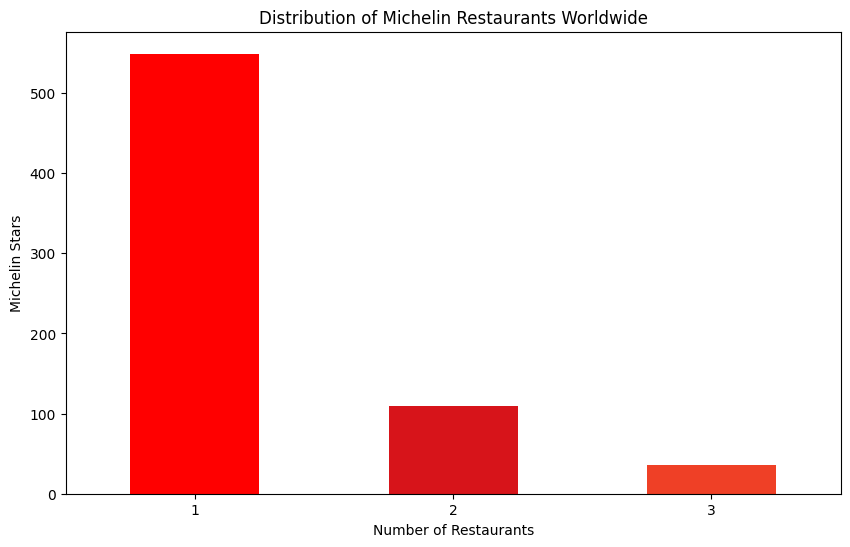

In [100]:
# Plotting the Michelin Restaurants Worldwide
colors = ['#FF0000', '#D7141A', '#EF4026']
star_counts.plot(kind='bar', figsize=(10, 6), color=colors)
plt.xlabel('Number of Restaurants')
plt.ylabel('Michelin Stars')
plt.title('Distribution of Michelin Restaurants Worldwide')
plt.xticks(rotation=0) 
plt.show()

**Conclusion:** The above plot provides a clear and visual representation of the distribution of Michelin stars worldwide, emphasizing the relative rarity of two and three-star establishments compared to one-star restaurants. This insight aligns with the difficulty to meet the expectations of Michelin Guide standards.

*** Number of Michelin Restaurants by Country:**

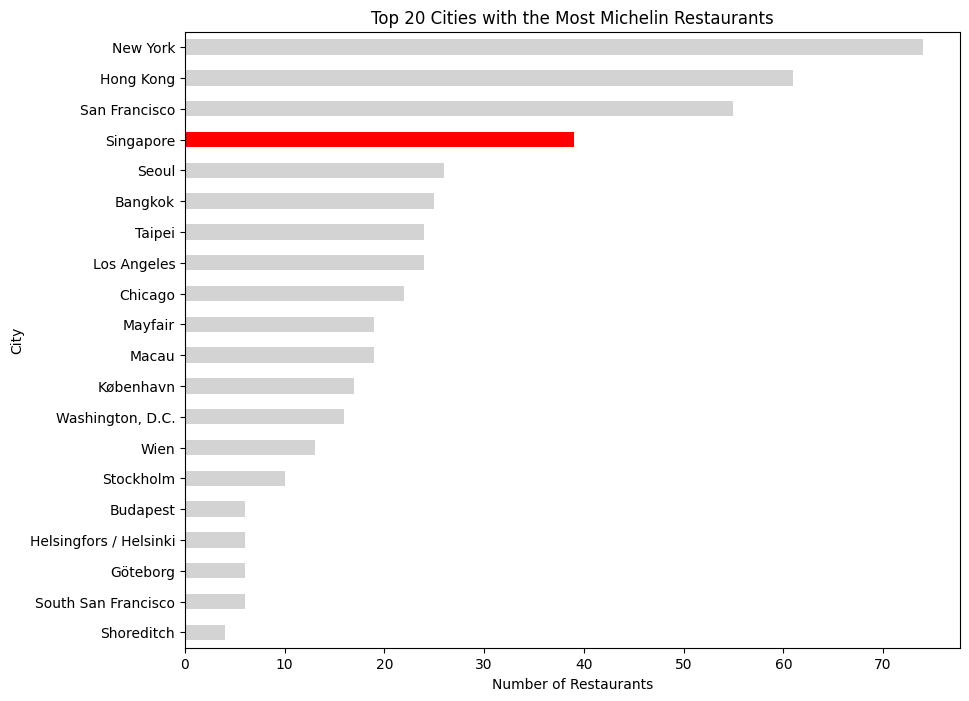

In [101]:
city_counts = michelin_stars['city'].value_counts().sort_values(ascending=False).head(20)

# Custom color palette
palette = ['lightgrey' if city != 'Singapore' else 'red' for city in city_counts.index]

# Plotting the horizontal bar chart with custom colors
plt.figure(figsize=(10, 8))
city_counts.plot(kind='barh', color=palette)
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Top 20 Cities with the Most Michelin Restaurants')
plt.gca().invert_yaxis()  # Inverted the y-axis for the highest count on top
plt.show()

**Conclusion:** The above plot above provides a clear visualization of the distribution of Michelin restaurants by cities, showing the more predominantly concentrated in specific continents, such as America and Asia, reflecting the culinary reputation and gastronomic culture of these regions. 
Singapore's position on the top 5, highlighted in red, underscores its importance and recognition in the global culinary landscape.
Despite being a relatively small city-state, Singapore's high number of Michelin-starred restaurants highlights its culinary excellence and the quality of its dining establishments.

*** Distribution of the Michelin Stars Price Range Worldwide ($):**

In [102]:
#Arranging price($) into 5 different groups (Inexpensive, Moderate, Expensive, Very Expensive, Luxury):

def price_group(price_symbol):
    return ('Inexpensive' if price_symbol == '$' 
            else 'Moderate' if price_symbol == '$$' 
            else 'Expensive' if price_symbol == '$$$' 
            else 'Very Expensive' if price_symbol == '$$$$' 
            else 'Luxury' if price_symbol == '$$$$$' 
            else 'Unknown')

price_group_counts = michelin_stars.copy()
michelin_stars['price_group'] = michelin_stars['price'].apply(price_group)
price_group_counts = michelin_stars['price_group'].value_counts()
print(price_group_counts)

price_group
Very Expensive    197
Unknown           176
Expensive         143
Moderate           75
Luxury             73
Inexpensive        31
Name: count, dtype: int64


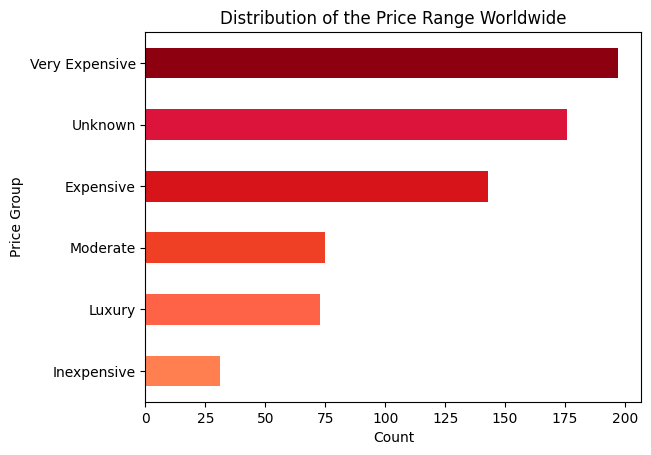

In [103]:
# Plotting in a horizontal bar chart for a better reading

colors = ['#FF7F50', '#FF6347', '#EF4026', '#D7141A', '#DC143C', '#8C000F'] 
price_group_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Distribution of the Price Range Worldwide')
plt.xlabel('Count')
plt.ylabel('Price Group')
plt.show()

**Conclusion:** 
* The above plot refelects the analysis of price groups among Michelin restaurants, showing a clear trend towards high-end and luxury dining experiences. 

* The predominance of 'Very Expensive' and 'Luxury' categories underscores the association of Michelin stars with premium pricing. 

* However, the presence of 'Moderate' and 'Expensive' categories indicates that Michelin recognition is also achievable for restaurants that offer exceptional quality at relatively lower price points. 

* With only a few restaurants in the 'Inexpensive' category, it is evident that Michelin-starred dining is less common at the lower end of the price spectrum. This reflects the perception that Michelin recognition is typically associated with more costly dining experiences.

* The significant 'Unknown' category highlights the need for more consistent data collection in future analyses.

* **Distribution of Price Range($) by Michelin Stars Worldwide:**

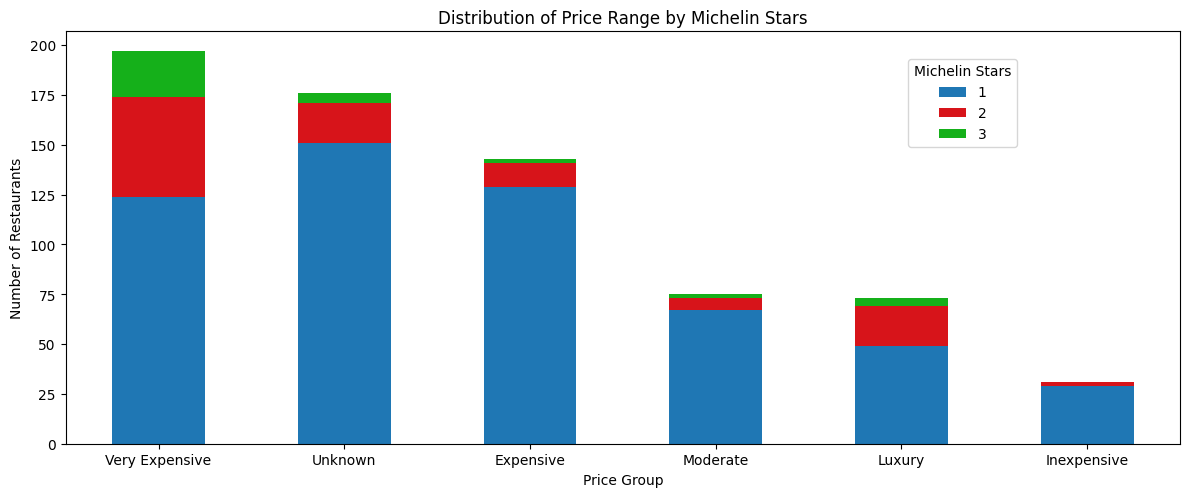

In [104]:
#Plotting a stacked bar chart
pivot_table = michelin_stars.pivot_table(index='price_group', columns='Michelin stars', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='Total', ascending=False)
pivot_table = pivot_table.drop(columns='Total') 


colors = ['#1f77b4', '#D7141A', '#15B01A']
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Distribution of Price Range by Michelin Stars')
plt.xlabel('Price Group')
plt.ylabel('Number of Restaurants')
plt.legend(title='Michelin Stars', loc='upper left', bbox_to_anchor=(0.75, 0.95))  # Adjusted to put legend inside
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()



**Conclusion:** 

* The above plot illustrates the diversity of price points among Michelin restaurants, showing a notable inclination towards 'Very Expensive' dining experiences. 

* One-star restaurants are the most common across all price groups, while two-star and three-star establishments are more prevalent in the 'Very Expensive' and 'Luxury' categories. 

* The significant 'Unknown' category highlights the need for more consistent data collection in future analyses.

   * Distribution of the Top 15 Michelin Star Cuisines in **Worldwide**:

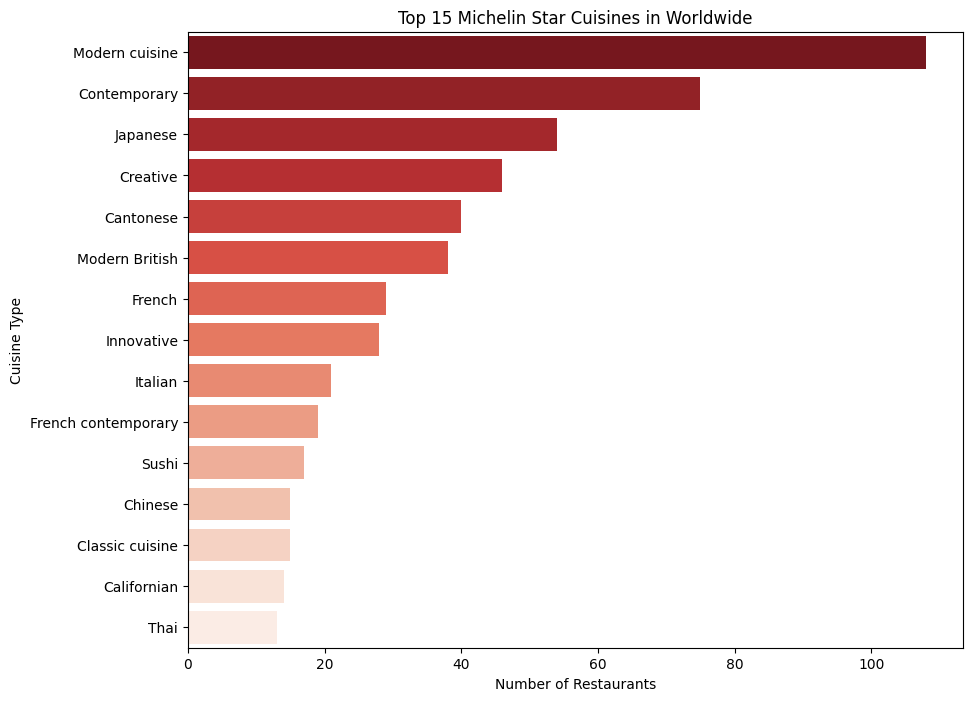

In [106]:
cuisine_counts = michelin_stars['cuisine'].value_counts().head(15)

# Plotting 
plt.figure(figsize=(10, 8))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='Reds_r')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Top 15 Michelin Star Cuisines in Worldwide')
plt.show()

**Conclusion:**

* The above plot reveals the rich diversity of cuisines celebrated by Michelin stars, ranging from traditional to innovative culinary styles. It shows that the cuisines that are the most popular in Michelin Restaurants are Modern Cuisine, Contemporary, Japonese, Creative and Cantonese.

* An interesting point is that the world famous cuisines such as the Italian, French and British are NOT on the top of the list.

* Distribution of the Top 10 Michelin Star Cuisines in the **USA**(top cities-New York and San Francisco):

Top 10 Michelin Star Cuisines in the USA (New York and San Francisco):
cuisine
Contemporary    39
Japanese        27
Californian     11
French           8
American         6
Italian          6
Mexican          4
Korean           4
Indian           3
Seafood          3
Name: count, dtype: int64


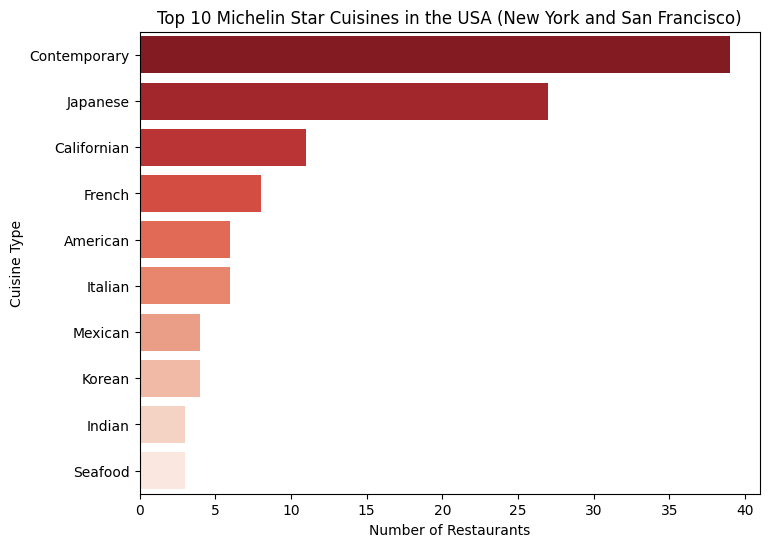

In [27]:
#Finding the top 10 awarded cuisines in USA (top cities-New York and San Francisco)  to compare with the top 5 Singapore awarded cuisines

usa_restaurants = michelin_stars[(michelin_stars['city'] == 'New York') | (michelin_stars['city'] == 'San Francisco')]
cuisine_counts_usa = usa_restaurants['cuisine'].value_counts().head(10)

print("Top 10 Michelin Star Cuisines in the USA (New York and San Francisco):")
print(cuisine_counts_usa)

# Plotting the findings for USA (New York and San Francisco)
plt.figure(figsize=(8, 6))
sns.barplot(x=cuisine_counts_usa.values, y=cuisine_counts_usa.index, palette='Reds_r')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Michelin Star Cuisines in the USA (New York and San Francisco)')
plt.show()


**Conclusion:**

The above plot reveals that the cuisines that are the most popular in USA Michelin Restaurants are Contemporary, Japonese and French.

* Distribution of the Top 10 Michelin Star Cuisines in **Singapore**:

(39, 10)


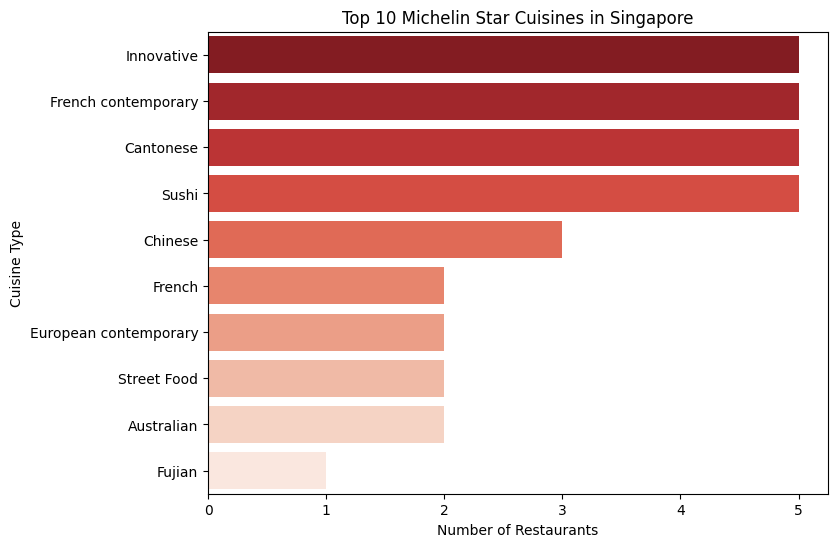

In [115]:
singapore_restaurants = michelin_stars[michelin_stars['city'] == 'Singapore']
cuisine_counts_singapore = singapore_restaurants['cuisine'].value_counts().head(10)
print(singapore_restaurants.shape)

#Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=cuisine_counts_singapore.values, y=cuisine_counts_singapore.index, palette='Reds_r')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Michelin Star Cuisines in Singapore')
plt.show()

**Conclusion:**

The above plot reveals that the cuisines that are the most popular in Singapore Michelin Restaurants are Innovative, French contemporary, Cantonese and Sushi.

* **Distribution of Cuisine by Michelin Stars in Singapore**

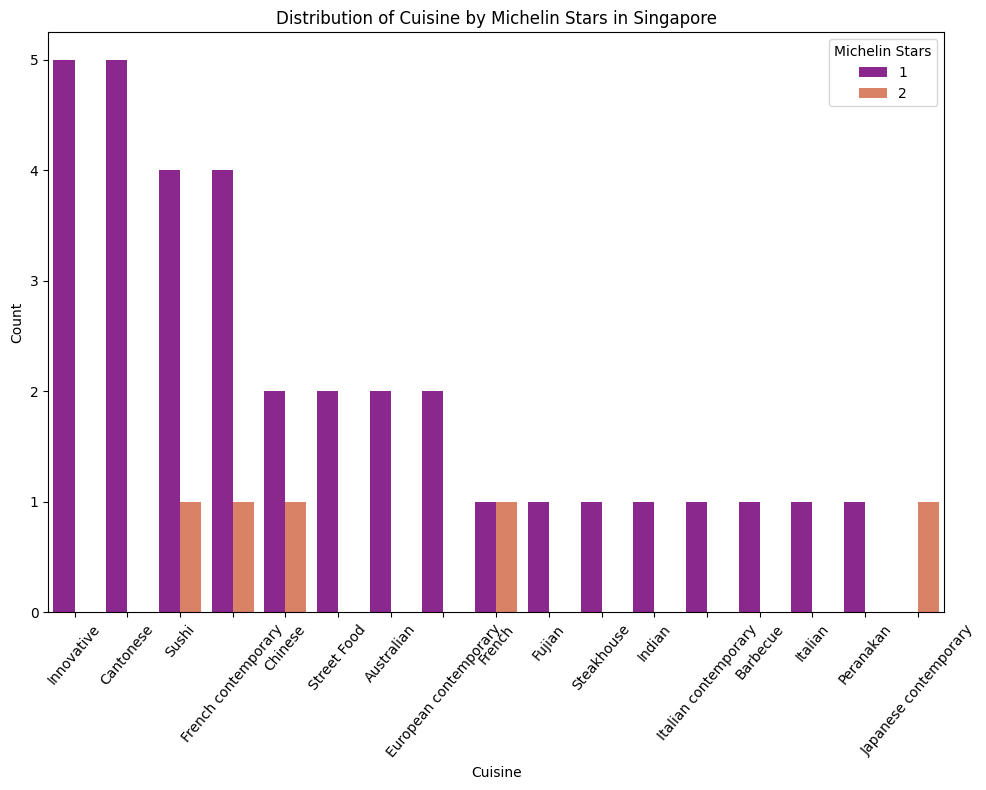

In [137]:
# Plotting cuisine counts by Michelin stars in Singapore
cuisine_counts_sin = singapore_restaurants['cuisine'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10, 8))
sns.countplot(x='cuisine', hue='Michelin stars', data=singapore_restaurants, order= cuisine_counts_sin, palette='plasma')
plt.title('Distribution of Cuisine by Michelin Stars in Singapore')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.legend(title='Michelin Stars')
plt.tight_layout()
plt.show()


*** Distribution of Cuisine by Price Range in Singapore:**

price_group
Inexpensive       16
Moderate          11
Expensive          7
Very Expensive     3
Luxury             2
Name: count, dtype: int64


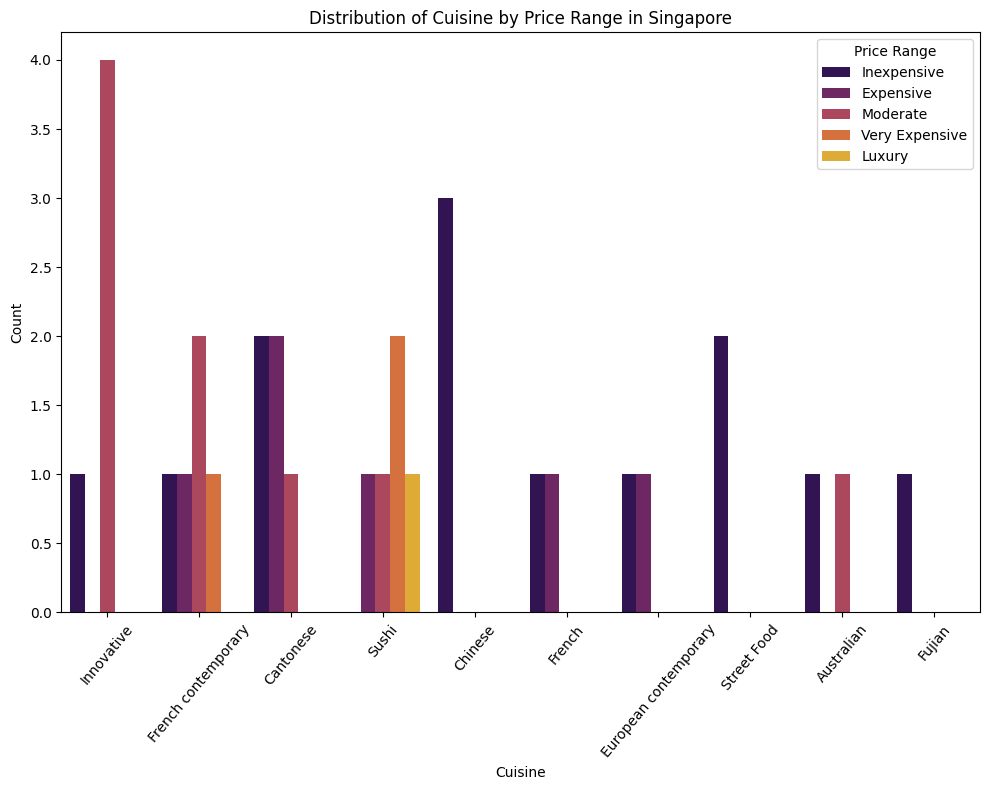

In [136]:
# Plotting cuisine counts by price range in Singapore
price_range_singapore = singapore_restaurants['price_group'].value_counts()
print(price_range_singapore)

cuisine_counts_sin = singapore_restaurants['cuisine'].value_counts().head(10).sort_values(ascending=False).index

plt.figure(figsize=(10, 8))
sns.countplot(x='cuisine', hue='price_group', data=singapore_restaurants, order= cuisine_counts_sin, palette='inferno')
plt.title('Distribution of Cuisine by Price Range in Singapore')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()

**Conclusion:**

In the above plot, we observe that:

* There are 16 cuisines that fall into the "Inexpensive" category. This suggests a strong presence of affordable dining options in Singapore, which is an interesting finding for this particular wealthy country.

* There are 11 cuisines categorized as "Moderate", indicating a balanced mix of mid-range dining choices.

* The rest of the categories represent fewer cuisines, indicating that high-end dining options are relatively limited compared to more affordable choices.

**Geographic Distribution of Michelin star Cuisine Types in Singapore:**

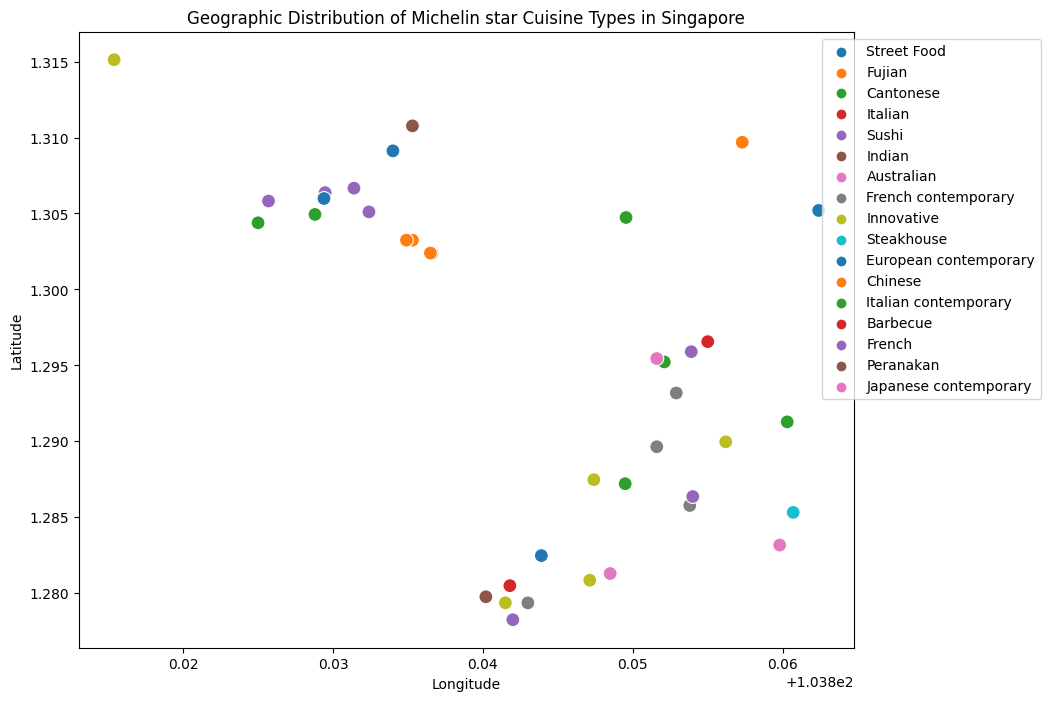

In [29]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=singapore_restaurants, hue='cuisine', palette='tab10', s=100)
plt.title('Geographic Distribution of Michelin star Cuisine Types in Singapore')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


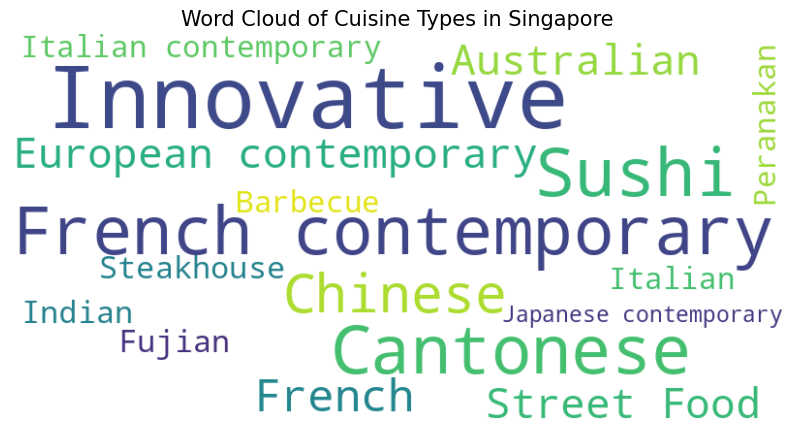

In [122]:
from wordcloud import WordCloud

cuisine_counts_sin = singapore_restaurants['cuisine'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cuisine_counts_sin)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word Cloud of Cuisine Types in Singapore', fontsize=15)
plt.show()